# Radiation modes of slab waveguide

Again for the simple 3 layer structure: cladding-core-cladding.  

In [28]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from slab import SlabExact
from ipywidgets import interactive, Play, IntSlider, jslink, HBox, FloatSlider
# plt.style.use('dark_background')


In [29]:
A = SlabExact(ns=[1.2, 1.5, 1.2], ts=[15e-6, 2e-6, 15e-6], xrefs=[800,200,800], symmetric=True)

In [30]:
field_type = 'TE'
mode_type = 'radiation'

In [31]:
k_low = A.K_low
k_low

4.1887902047863905

In [32]:
Z = 0

In [33]:
F = A.fields(Z, field_type=field_type, mode_type=mode_type, Z_plane=True)


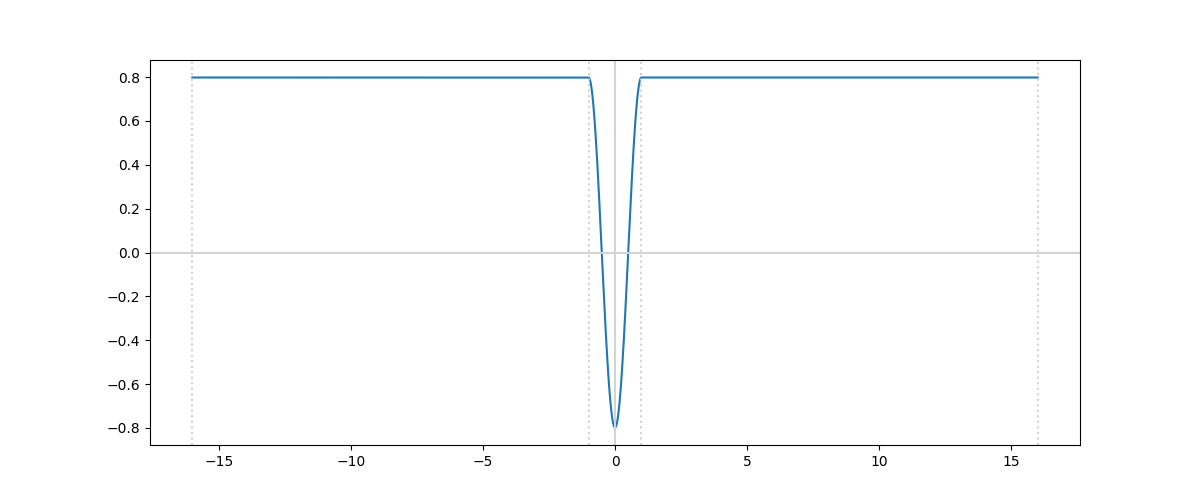

In [34]:
A.plot_field_1d(F, plot_axis=True, part='real')

In [35]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(12,6))

def f(Z):
    ax = plt.gca()
    ax.clear()
    F = A.fields(Z, field_type=field_type, mode_type=mode_type, Z_plane=True)
    xs = A.all_Xs
    ax.plot(xs, F(xs).real)
    ym, yM = ax.get_ylim()
    xm, xM = ax.get_xlim()
    ax.plot([xm, xM], [0,0], linewidth=.5, color='gray')
    ax.plot([0,0],[ym,yM], '--', linewidth=.5, color='gray')
    for Rho in A.Rhos:
        ax.plot([Rho, Rho],[ym,yM], '--', linewidth=.5, color='gray') 
    ax.set_ylim(ym,yM)
    ax.set_xlim(xm,xM)

    plt.show()

interactive_plot = interactive(f, Z=(0, 5, .1))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot


interactive(children=(FloatSlider(value=2.0, description='Z', max=5.0), Output(layout=Layout(height='650px')))…

# Hollow Core

In [36]:
B = SlabExact(scale=1e-6, ts=[5e-6, 2e-6, 3e-6, 2e-6, 5e-6],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 100, 200, 100, 500],
              symmetric=True, wl=1e-6, shift=0)

In [38]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(12,6))

def f(Z):
    ax = plt.gca()
    ax.clear()
    F = B.fields(Z, field_type=field_type, mode_type=mode_type, Z_plane=True)
    xs = B.all_Xs
    ax.plot(xs, F(xs).real)
    xm, xM = ax.get_xlim()
    ax.plot([xm, xM], [0,0], linewidth=.5, color='gray')
    ax.plot([0,0],[-2,2], '--', linewidth=.5, color='gray')
    for Rho in B.Rhos:
        ax.plot([Rho, Rho],[-2,2], '--', linewidth=.5, color='gray') 
    ax.set_ylim(-1,1)
    ax.set_xlim(xm,xM)

    plt.show()

interactive_plot = interactive(f, Z=(0.0001, 10, .03))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot


interactive(children=(FloatSlider(value=4.980099999999999, description='Z', max=10.0, min=0.0001, step=0.03), …